# Data Wrangling project with Enhanced Twitter Archive

* I read three data 
* Data Wrangling project
* twitter = twitter archive enhanced
* imageP = image predictions.tsv
* df3 = tweets json file

before I start the coding I will tell you about API  I have been told from my instructor that we are not able to get authorization from twitter so he asked us to read it normally and we write the API json code as a markdown just for prove


Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN' consumer_secret = 'HIDDEN' access_token = 'HIDDEN' access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret) auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values len(tweet_ids)

Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0 fails_dict = {} start = timer()

Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:

# This loop will likely take 20-30 minutes to run because of Twitter's rate limit

for tweet_id in tweet_ids:

    count += 1
    
    print(str(count) + ": " + str(tweet_id))
    
    try:
    
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        
        print("Success")
        
        json.dump(tweet._json, outfile)
        
        outfile.write('\n')
        
    except tweepy.TweepError as e:
    
        print("Fail")
        
        fails_dict[tweet_id] = e
        
        pass
        
end = timer() print(end - start) print(fails_dict)

# Gather

In [89]:
#import All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import seaborn as sns



#### read the Twitter Archive file

In [3]:
twitter = pd.read_csv('twitter-archive-enhanced-2.csv')

#### stoe the index 

In [4]:
twitter.sort_values('timestamp')
twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Twitter Image prediction
 

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [6]:
with open('image-predictions-3.tsv',mode='wb') as file:
    file.write(response.content)
imageP=pd.read_csv('image-predictions-3.tsv', sep='\t')
#I but sep='\t becase the data is untidy
imageP.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### read text file json

In [7]:
tweets_1=[]
with open('tweet-json copy 3.txt')as file:
    for line in file:
        try:
            T_weet = json.loads(line)
            tweets_1.append(T_weet)
        except:
            continue
df3 = pd.DataFrame(tweets_1, columns=list(tweets_1[0].keys()))
df3.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en


In [8]:
twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [9]:
imageP.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [10]:
df3.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en


# Assessing the data

In [11]:
twitter.shape

(2356, 17)

In [12]:
twitter.mean()

tweet_id                    7.427716e+17
in_reply_to_status_id       7.455079e+17
in_reply_to_user_id         2.014171e+16
retweeted_status_id         7.720400e+17
retweeted_status_user_id    1.241698e+16
rating_numerator            1.312649e+01
rating_denominator          1.045543e+01
dtype: float64

In [13]:
twitter.duplicated().sum()

0

there is no any duplicated

In [14]:
twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

# information of twitter archive enhanced

In [15]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### problems for twitter archive enhanced (twitter)

* there is null value in some columns 
* removing the unwanted columns
* the type of the timestamp columns  changing it from string to date time type

# information of image predictions.tsv (imageP)

In [17]:
imageP.shape

(2075, 12)

In [18]:
imageP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
imageP.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
imageP.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
imageP.mean()

tweet_id    7.384514e+17
img_num     1.203855e+00
p1_conf     5.945483e-01
p1_dog      7.383133e-01
p2_conf     1.345886e-01
p2_dog      7.484337e-01
p3_conf     6.032417e-02
p3_dog      7.224096e-01
dtype: float64

In [22]:
imageP.duplicated().sum()

0

In [23]:
imageP['jpg_url'].duplicated().sum()

66

In [24]:
imageP['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
coho                    1
padlock                 1
sea_urchin              1
orange                  1
wild_boar               1
Name: p1, Length: 378, dtype: int64

### problems for image predictions.tsv (imageP)

* there is 66 in duplicated jpg_url, and we will remove them 
* wthere is some underscores in p1 and p2 and p3 instead of spaces and they are useless
* There are problems with formatting characters

# information of tweets json file(df3)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [26]:
df3.shape

(2354, 27)

In [27]:
df3.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000


### problems for tweets json file (df3)

* dropping the unwanted columns
* renaming the id column to tweet id

# Cleaning The Data

the First fixing twitter archive enhanced (twitter)

In [28]:
twitter2=twitter.copy()

In [29]:
imageP2=imageP.copy()

In [30]:
df3_2=df3.copy()

* Fist twitter2

* 1-in our twitter2 the tweet_id is int and we need to fixed it, Because alwayes the id is str

In [31]:
 twitter2['tweet_id']=twitter2['tweet_id'].astype("str")

* 2-remove tweets that are not original(retweets)

In [32]:
twitter2=twitter2[np.isnan(twitter2['retweeted_status_id'])]

In [33]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

* 3-Drop some columns 

In [34]:
twitter2.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

In [35]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+

* 4- transofrm the datatype of rating_numerator from int to flot 

In [36]:
twitter2['rating_numerator']= twitter2['rating_numerator'].astype('float')


In [37]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   float64
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 254.9+

* 5-changing the timestamp to date time type

In [38]:
twitter2['timestamp'] = pd.to_datetime(twitter2['timestamp'])

In [39]:
twitter2.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None


* 6- dropping the expanded urls missing values

In [40]:
twitter2['expanded_urls'].isna().sum()

58

In [41]:
twitter2['expanded_urls'].dropna(inplace=True)

In [42]:
twitter2['expanded_urls'].isna().sum()

0

## Fixing image predictions

* 1- fixing the datatype of the "tweet id"

In [43]:
imageP2['tweet_id'] = imageP2['tweet_id'].astype('str')

* 2- dropping the duplicates in jpg url

In [44]:
imageP2['jpg_url'].drop_duplicates(inplace=True)

In [45]:
#check
imageP2['jpg_url'].duplicated().sum()

0

* 3- fixing the capital words and capital letters, where some of them are capital and the others aren't

imageP2['p1']=imageP2['p1'].str.lower()
imageP2['p2']=imageP2['p2'].str.lower();
imageP2['p3']=imageP2['p3'].str.lower();

In [46]:
imageP2['p1'] = imageP2['p1'].str.replace('_',' ')
imageP2['p2'] = imageP2['p2'].str.replace('_',' ')
imageP2['p3'] = imageP2['p3'].str.replace('_',' ')

* 4- replacing the underscore with spaces

In [47]:
imageP2['p1']=imageP2['p1'].str.lower()
imageP2['p2']=imageP2['p2'].str.lower();
imageP2['p3']=imageP2['p3'].str.lower();

# fixing quality for tweets json file (df3)

In [48]:
df3_2.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en


* 1- rename the columns id

In [49]:
df3_2.rename(columns={'id':'tweet_id'}, inplace=True);

In [50]:
df3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   tweet_id                       2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [51]:
df3_2['tweet_id']= df3_2['tweet_id'].astype('str')

* 2- dropping useless columns in df3

In [52]:
df3_2.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [53]:
df3_2.drop(['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id','in_reply_to_user_id_str'
              ,'in_reply_to_screen_name','geo','coordinates','place'], axis =1, inplace=True)

In [54]:
df3_2.drop(['contributors'], axis =1, inplace=True)

In [55]:
df3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2354 non-null   object
 1   tweet_id                       2354 non-null   object
 2   id_str                         2354 non-null   object
 3   full_text                      2354 non-null   object
 4   truncated                      2354 non-null   bool  
 5   display_text_range             2354 non-null   object
 6   entities                       2354 non-null   object
 7   extended_entities              2073 non-null   object
 8   source                         2354 non-null   object
 9   user                           2354 non-null   object
 10  is_quote_status                2354 non-null   bool  
 11  retweet_count                  2354 non-null   int64 
 12  favorite_count                 2354 non-null   int64 
 13  fav

# Tidiness data

twitter2=twitter.copy()
imageP2=imageP.copy()
df3_2=df3.copy()

In [56]:
twitter2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [57]:
twitter2['All_dogs']=twitter2['doggo']+twitter2['floofer']+twitter2['pupper']+twitter2['puppo']

In [58]:
twitter2['All_dogs'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [59]:
twitter2.loc[twitter2['All_dogs'] == 'NoneNoneNoneNone',['All_dogs']] = 'None'
twitter2.loc[twitter2['All_dogs'] == 'doggoNoneNoneNone',['All_dogs']] = 'doggo'
twitter2.loc[twitter2['All_dogs'] == 'NoneNoneNonepuppo',['All_dogs']] = 'puppo'
twitter2.loc[twitter2['All_dogs'] == 'NoneNonepupperNone',['All_dogs']] = 'pupper'
twitter2.loc[twitter2['All_dogs'] == 'NoneflooferNoneNone',['All_dogs']] = 'floofer'
twitter2.loc[twitter2['All_dogs'] == 'doggoNoneNonepuppo',['All_dogs']] = 'doggo, puppo'
twitter2.loc[twitter2['All_dogs'] == 'doggoflooferNoneNone',['All_dogs']] = 'doggo, floofer'
twitter2.loc[twitter2['All_dogs'] == 'doggoNonepupperNone',['All_dogs']] = 'doggo, pupper'

In [60]:
twitter2.drop(['puppo','pupper','floofer','doggo'],axis=1, inplace=True)

In [61]:
twitter2['All_dogs'].value_counts()

None              1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: All_dogs, dtype: int64

 * merging and combining all the 3 tables together

In [62]:
imageP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [63]:
The_main = pd.merge(twitter2,imageP2, on ='tweet_id', how = 'inner')

In [64]:
The_main = pd.merge(The_main,df3_2, on='tweet_id', how='inner')

In [65]:
The_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1994 non-null   object             
 1   in_reply_to_status_id          23 non-null     float64            
 2   in_reply_to_user_id            23 non-null     float64            
 3   timestamp                      1994 non-null   datetime64[ns, UTC]
 4   source_x                       1994 non-null   object             
 5   text                           1994 non-null   object             
 6   expanded_urls                  1994 non-null   object             
 7   rating_numerator               1994 non-null   float64            
 8   rating_denominator             1994 non-null   int64              
 9   name                           1994 non-null   object             
 10  All_dogs                

In [66]:
The_main.drop(['possibly_sensitive_appealable','possibly_sensitive'],axis=1, inplace=True)

In [67]:
The_main.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,entities,extended_entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en


In [68]:
The_main.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.300000e+01,2.300000e+01,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,6.978112e+17,4.196984e+09,12.280843,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,4.359384e+16,0.000000e+00,41.497718,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,6.671522e+17,4.196984e+09,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.732411e+17,4.196984e+09,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,624.750000,1982.000000
50%,6.757073e+17,4.196984e+09,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,7.031489e+17,4.196984e+09,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,8.558181e+17,4.196984e+09,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


* from the previous table, we can see the average of favorites (likes) are 8556.7

# Draw each type of dog how many there are

In [69]:
twitter2['All_dogs'].value_counts()

None              1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: All_dogs, dtype: int64

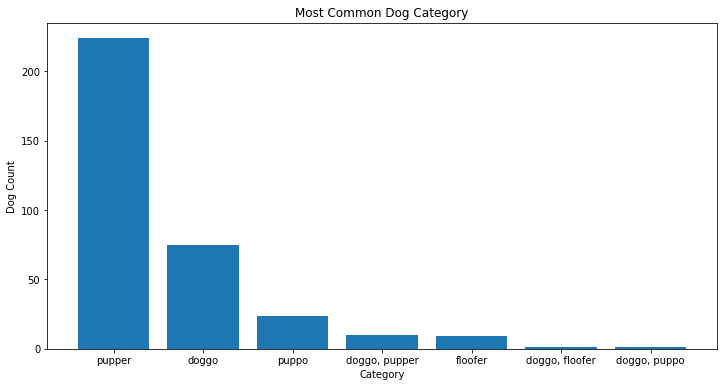

In [70]:
dog_type = ['pupper', 'doggo', 'puppo', 'doggo, pupper', 'floofer','doggo, floofer','doggo, puppo']
dog_counts = [224, 75, 24, 10, 9,1,1]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

* We Can see the pupper is the most dog 

In [71]:
The_main.corr()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted
in_reply_to_status_id,1.000000,NaN,-0.078811,-0.067949,0.076881,0.425057,-0.079810,-0.392543,-0.210564,-0.341782,0.133557,NaN,NaN,0.167515,0.595754,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,-0.078811,NaN,1.000000,0.198240,-0.000684,-0.009049,-0.029150,-0.020724,-0.034601,-0.004173,-0.029355,NaN,NaN,0.013879,0.009995,0.000144,NaN
rating_denominator,-0.067949,NaN,0.198240,1.000000,-0.004094,-0.004240,0.000640,-0.034964,-0.000709,0.007071,0.004695,NaN,NaN,-0.021193,-0.028682,-0.003645,NaN
img_num,0.076881,NaN,-0.000684,-0.004094,1.000000,0.204406,0.032674,-0.156773,0.052354,-0.141409,0.062725,NaN,NaN,0.107198,0.137053,0.017608,NaN
p1_conf,0.425057,NaN,-0.009049,-0.004240,0.204406,1.000000,0.126961,-0.509531,0.142268,-0.707994,0.119391,NaN,NaN,0.054591,0.079727,-0.035617,NaN
p1_dog,-0.079810,NaN,-0.029150,0.000640,0.032674,0.126961,1.000000,0.109214,0.635698,0.045770,0.558604,NaN,NaN,0.008552,0.054368,-0.016100,NaN
p2_conf,-0.392543,NaN,-0.020724,-0.034964,-0.156773,-0.509531,0.109214,1.000000,0.096064,0.480743,0.063713,NaN,NaN,-0.018472,-0.021680,-0.019817,NaN
p2_dog,-0.210564,NaN,-0.034601,-0.000709,0.052354,0.142268,0.635698,0.096064,1.000000,0.033552,0.554644,NaN,NaN,0.016161,0.060189,-0.017334,NaN
p3_conf,-0.341782,NaN,-0.004173,0.007071,-0.141409,-0.707994,0.045770,0.480743,0.033552,1.000000,0.032731,NaN,NaN,-0.044230,-0.053752,-0.011424,NaN


# Number of tweets in month

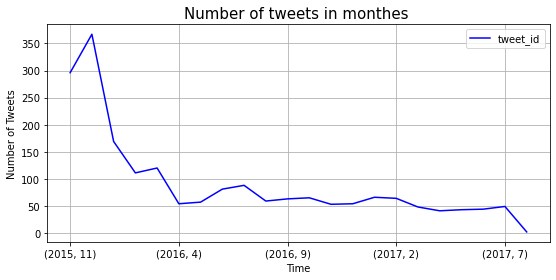

In [78]:
The_main['tweet_id'].groupby([The_main['timestamp'].dt.year, The_main['timestamp'].dt.month]).count().plot(kind='line',figsize=(9,4),color= 'b')
plt.title('Number of tweets in monthes ', size=15)
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.grid()
plt.legend()
plt.show()

* Month 11 in 2015 is the most interactive month

# correlation between Retweet And Favorite

No handles with labels found to put in legend.


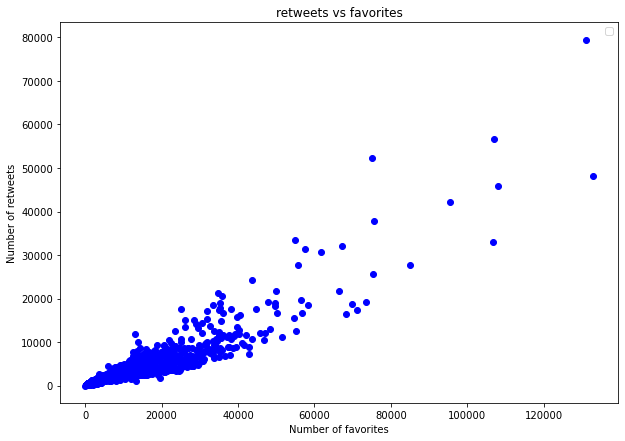

In [98]:
plt.figure(figsize=(10,7))
plt.scatter(The_main['favorite_count'],The_main['retweet_count'],color = "b")
plt.title('retweets vs favorites')
plt.xlabel('Number of favorites')
plt.ylabel('Number of retweets')
plt.legend()
plt.show()

* Positive relationship between them mean if the number of favorites increase the number of retweet will increase and that is good 

The_main.to_cv('Twitter_3.csv',index=False)

In [118]:
The_main.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,entities,extended_entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en


# The languages of users 

In [126]:
The_main["lang"].value_counts()

en    1987
nl       3
in       2
et       1
eu       1
Name: lang, dtype: int64

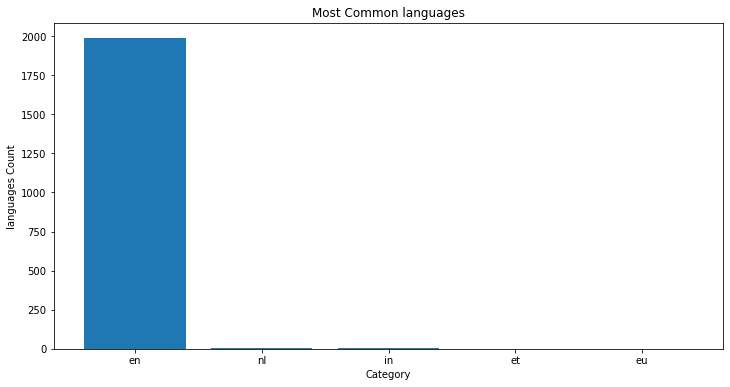

In [129]:
dog_type = ['en', 'nl', 'in', 'et', 'eu']
dog_counts = [1987, 3, 2, 1, 1]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('languages Count')
ax.set_xlabel('Category')
plt.title("Most Common languages")
plt.show()

* All  he users are using english languages (99%)